In [37]:
import pickle

dataset = "pomt"
index_splits = pickle.load(open(f"multi_fc_publicdata/{dataset}/{dataset}_index_split.pkl", "rb"))
labels = pickle.load(open(f"multi_fc_publicdata/{dataset}/{dataset}_labels.pkl", "rb"))

In [38]:
print(labels)

['pants on fire!', 'false', 'mostly false', 'half-true', 'mostly true', 'true']


In [39]:
import pandas as pd

# read data file multi_fc_publicdata/pomt/pomt.tsv
data = pd.read_csv(f"multi_fc_publicdata/{dataset}/{dataset}.tsv", sep="\t", header=None)

# get the index of testset
test_index = index_splits[2]
print(len(test_index))

2717


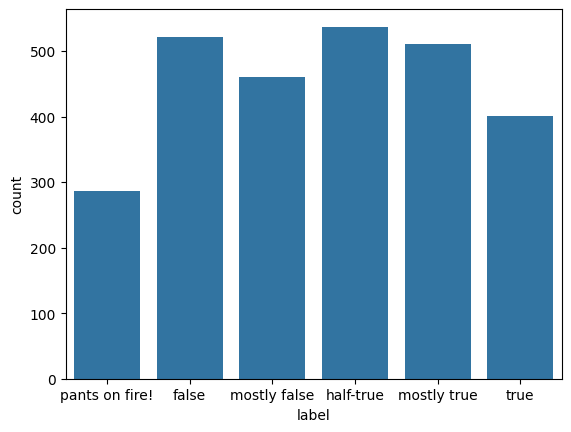

In [40]:
# load testset
test_data = data.iloc[test_index]
test_data = test_data.iloc[:, [0, 1, 2, 6]]
test_data.columns = ['claimId', 'claim', 'label', 'speaker']

# visualize the label distribution
import seaborn as sns
import matplotlib.pyplot as plt

# the order of the label should be the same as variable labels
sns.countplot(x='label', data=test_data, order=labels)
plt.show()


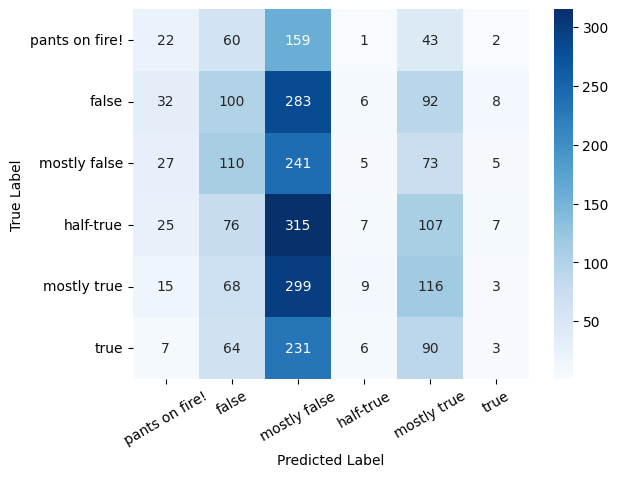

In [44]:
import pandas as pd

pred_labels = pd.read_csv(f"result/{dataset}_labels.csv")
true_labels = test_data[['claimId', 'label']]
# merge true_labels and pred_labels by claimId
result = pd.merge(true_labels, pred_labels, on='claimId')

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# the order of the label should be the same as variable labels
cm = confusion_matrix(result['label'], result['label_pred'], labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# rotate xticks
plt.xticks(rotation=30)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()